In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
dataset = pd.read_csv('data/2_resampled_heart_attack_data.csv')
dataset

,Sex,Cholesterol,Diabetes,Family History,Smoking,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,...,Triglycerides,Activity per Week,Sleeping Hours,Country,Systolic,Diastolic,Age_HeartRate,Obesity_SedentaryHours,Continent_Hemisphere,Heart Attack Risk
0,0.726101,-0.669276,-1.230937,-0.876196,0.369778,-1.096767,-1.052710,-1.166333,-0.887026,-0.900868,...,-0.611633,-1.542647,-0.481747,-1.667967,0.900568,0.208016,0.408458,0.039778,1.953224,0
1,0.726101,1.658595,0.812389,1.141297,0.369778,0.911770,-1.474668,1.346146,1.127363,-0.900868,...,-0.847316,-1.088367,0.039381,-1.130430,1.176979,0.561753,-1.001631,-0.153722,1.038289,0
2,-1.377218,0.822619,0.812389,-0.876196,-2.704326,-1.096767,-1.427166,0.089907,1.127363,1.110040,...,0.779360,0.274474,-1.524003,-0.592893,1.532366,0.986238,-1.279978,0.885725,0.123355,0
3,0.726101,1.581428,0.812389,1.141297,0.369778,0.911770,-0.038565,-1.166333,1.127363,-0.900868,...,-0.186479,-0.179806,-1.524003,-1.130430,1.098005,1.056986,1.075268,0.346857,1.038289,0
4,0.726101,0.745452,0.812389,1.141297,0.369778,-1.096767,-0.759553,1.346146,1.127363,-0.900868,...,-0.865801,-1.088367,-1.002875,1.198896,-1.745088,0.208016,1.078327,-1.177925,-0.791579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11243,-1.377218,-0.720720,-1.230937,-0.876196,0.369778,0.911770,1.004719,-1.166333,-0.887026,-0.900868,...,1.102847,-1.088367,-0.481747,-0.592893,-0.007643,0.491006,-0.473485,-0.435547,-0.334112,1
11244,-1.377218,1.054120,-1.230937,-0.876196,0.369778,0.911770,0.618424,0.089907,-0.887026,-0.900868,...,-1.535881,-0.634086,-1.524003,0.303002,-0.560466,-1.206934,-0.648854,1.764551,-0.334112,1
11245,-1.377218,1.671456,0.812389,-0.876196,0.369778,0.911770,1.193882,1.346146,-0.887026,-0.900868,...,1.518758,1.183035,0.039381,-1.667967,-1.389702,-0.074974,0.004192,1.261693,1.953224,1
11246,0.726101,1.671456,-1.230937,-0.876196,0.369778,-1.096767,-0.877661,0.089907,-0.887026,-0.900868,...,0.876406,1.183035,-1.524003,-0.413714,-1.034315,1.622965,0.283559,-0.912899,-0.791579,1


In [3]:
X = dataset.drop('Heart Attack Risk', axis=1)
y = dataset['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
y_pred = knn.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6231111111111111


In [7]:
# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.601878612716763
Recall: 0.7371681415929203
F1 Score: 0.6626889419252188
ROC AUC: 0.6226019279393173


In [8]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9,11,13,15],
    'leaf_size': [20, 40, 1],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

# Create the KNN classifier
knn = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(knn, param_grid, cv=cv, scoring='roc_auc')

# Fit the data to perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Best Parameters: {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best Score: 0.7041530714317201


In [9]:
knn = KNeighborsClassifier(leaf_size=20,
                           metric='minkowski',
                           n_neighbors=5,
                           p=1,
                           weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, p=1, weights='distance')

In [10]:
y_pred = knn.predict(X_test)

In [11]:
# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

Precision: 0.6162046908315565
Recall: 0.7672566371681416
F1 Score: 0.6834844304296414
ROC AUC: 0.6425568900126422


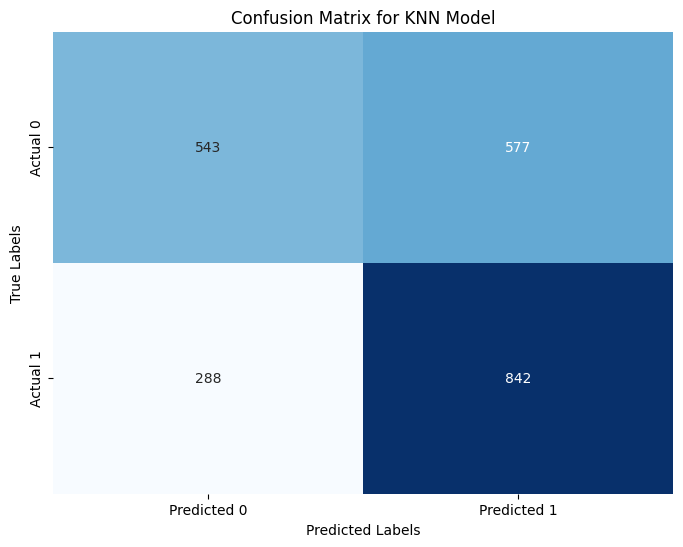

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Model')
plt.show()